In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir =  "C:/R_Lang/Hackathons/Kaggle/Home_Credit_Group/"

In [3]:
read_train =  pd.read_csv(data_dir+"application_train.csv")

In [4]:
len(read_train),read_train.shape

(307511, (307511, 122))

In [5]:
read_train.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
read_train.dtypes.head(3)

SK_ID_CURR             int64
TARGET                 int64
NAME_CONTRACT_TYPE    object
dtype: object

info will give you what are the different datatypes and count in your dataframe

In [7]:
read_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


To get a list of specific data type in a dataframe use the command select_dtypes(["object"]), it will give the dataframe. To get the column names from that dataframe use the list command

In [8]:
list(read_train.select_dtypes(["object"]))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [9]:
for i in list(read_train.select_dtypes(["object"])):
    print(read_train.groupby(i).size(), "\n")

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64 

CODE_GENDER
F      202448
M      105059
XNA         4
dtype: int64 

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64 

FLAG_OWN_REALTY
N     94199
Y    213312
dtype: int64 

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
dtype: int64 

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
dtype: int64 

NAME_EDUCATION_TYPE
Academic degree                     164
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Secondary / secondary special    218391
dtype: int64 

NAME_FAMIL

size command will give you the frequency of the unique values of a column from data frame, where as unique as shown below will give only the unique values

In [10]:
read_train.groupby("WEEKDAY_APPR_PROCESS_START").size()

WEEKDAY_APPR_PROCESS_START
FRIDAY       50338
MONDAY       50714
SATURDAY     33852
SUNDAY       16181
THURSDAY     50591
TUESDAY      53901
WEDNESDAY    51934
dtype: int64

In [13]:
read_train["NAME_CONTRACT_TYPE"].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

count will give you the counts of values and sum will give you the sum of those values

In [14]:
#read_train.groupby("TARGET")["TARGET"].count()
#read_train.groupby("TARGET")["TARGET"].sum()

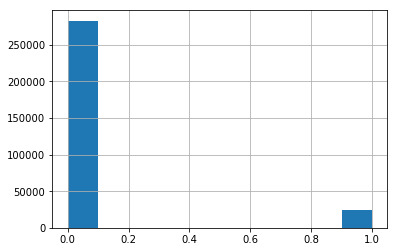

In [15]:
read_train["TARGET"].hist()
plt.show()

In [16]:
read_train[read_train["TARGET"] == 1]["TARGET"].count()/read_train["TARGET"].count()*100

8.0728819456864951

To check the % of missing values in the data frame ( use the is null to get the count of missing values)

In [21]:
missing_val_col_name  = (read_train.isnull().sum()*100/len(read_train)).sort_values(ascending=False) > 0.0

In [27]:
read_train[missing_val_col_name.index].head(10)

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,0.0144,0.0143,0.0144,0.0,0.0000,0.0000,reg oper account,0.0205,0.0220,0.0202,...,0,0,Business Entity Type 3,0,0,0,0,0,10,100002
1,0.0608,0.0605,0.0497,0.0,0.0039,0.0039,reg oper account,0.0787,0.0790,0.0773,...,0,0,School,0,0,0,0,0,11,100003
2,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,Government,0,0,0,0,0,9,100004
3,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,Business Entity Type 3,0,0,0,0,0,17,100006
4,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,Religion,1,1,0,0,0,11,100007
5,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,Other,0,0,0,0,0,16,100008
6,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,Business Entity Type 3,0,0,0,0,0,16,100009
7,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,Other,1,1,0,0,0,16,100010
8,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,XNA,0,0,0,0,0,14,100011
9,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,reg oper account,0.0513,0.0551,0.0504,...,0,0,Electricity,0,0,0,0,0,8,100012


In [28]:
read_train.isnull().sum().sort_values(ascending=False), len(read_train)

(AMT_REQ_CREDIT_BUREAU_YEAR      0
 REGION_RATING_CLIENT            0
 WEEKDAY_APPR_PROCESS_START      0
 HOUR_APPR_PROCESS_START         0
 REG_REGION_NOT_LIVE_REGION      0
 REG_REGION_NOT_WORK_REGION      0
 LIVE_REGION_NOT_WORK_REGION     0
 REG_CITY_NOT_LIVE_CITY          0
 REG_CITY_NOT_WORK_CITY          0
 LIVE_CITY_NOT_WORK_CITY         0
 ORGANIZATION_TYPE               0
 EXT_SOURCE_1                    0
 EXT_SOURCE_2                    0
 EXT_SOURCE_3                    0
 APARTMENTS_AVG                  0
 BASEMENTAREA_AVG                0
 YEARS_BEGINEXPLUATATION_AVG     0
 YEARS_BUILD_AVG                 0
 COMMONAREA_AVG                  0
 ELEVATORS_AVG                   0
 ENTRANCES_AVG                   0
 FLOORSMAX_AVG                   0
 FLOORSMIN_AVG                   0
 LANDAREA_AVG                    0
 LIVINGAPARTMENTS_AVG            0
 LIVINGAREA_AVG                  0
 NONLIVINGAPARTMENTS_AVG         0
 NONLIVINGAREA_AVG               0
 APARTMENTS_MODE    

In [20]:
read_train["FONDKAPREMONT_MODE"].mode()[0]

'reg oper account'

In [25]:
for i in range(len(missing_val_col_name)):
    
    if  missing_val_col_name[i]:
        #temp = read_train[missing_val_col_name.index[i]].mode()[0]
        if read_train[missing_val_col_name.index[i]].dtypes == "object":
            #print(read_train[missing_val_col_name.index[i]].groupby(read_train[missing_val_col_name.index[i]]).size())
            read_train[missing_val_col_name.index[i]] = read_train[missing_val_col_name.index[i]].fillna(read_train[missing_val_col_name.index[i]].mode()[0])
            
            #read_train[missing_val_col_name.index[i]] = read_train[missing_val_col_name.index[i]].fillna(temp)
        if read_train[missing_val_col_name.index[i]].dtypes == "float64":
            #read_train[missing_val_col_name.index[i]] = read_train[missing_val_col_name.index[i]].fillna(0)
            read_train[missing_val_col_name.index[i]] = read_train[missing_val_col_name.index[i]].fillna(read_train[missing_val_col_name.index[i]].mode()[0])
            

In [26]:
read_train.isnull().sum().sort_values(ascending=False).head(5)

AMT_REQ_CREDIT_BUREAU_YEAR    0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
REG_REGION_NOT_LIVE_REGION    0
dtype: int64

In [29]:
read_train.loc[read_train["CODE_GENDER"] == "XNA",'CODE_GENDER'] = "F"
read_train.loc[read_train["NAME_INCOME_TYPE"] == "Maternity leave",'NAME_INCOME_TYPE'] = "Working"
read_train.loc[read_train["NAME_FAMILY_STATUS"] == "Unknown",'NAME_FAMILY_STATUS'] = "Married"

In [30]:
read_train_dummy = pd.get_dummies(data= read_train)

In [31]:
read_train.shape, read_train_dummy.shape

((307511, 122), (307511, 243))

In [32]:
read_train_dummy.head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,1,0,0,1,0


In [33]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb

In [34]:
train_x, test_x, train_y,test_y = train_test_split(read_train_dummy.loc[:, 'CNT_CHILDREN':'EMERGENCYSTATE_MODE_Yes']
                                                   ,read_train_dummy["TARGET"],test_size=.3, random_state=0)

In [35]:
train_x.shape, train_y.shape, test_x.shape,test_y.shape

((215257, 241), (215257,), (92254, 241), (92254,))

In [43]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=1000,max_depth = 4,min_samples_leaf = 10
                           ,min_samples_split = 10,)
xgb_model = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1 )
GBoost = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='deviance', random_state =5)

In [ ]:
#rf.fit(read_train_dummy.loc[:, 'CNT_CHILDREN':'EMERGENCYSTATE_MODE_Yes'], read_train_dummy["TARGET"])
rf.fit(train_x,train_y)

In [ ]:
y_pred = rf.predict_proba(test_x)[:,1]

In [44]:
xgb_model.fit(train_x,train_y)
y_pred_xgb = xgb_model.predict_proba(test_x)[:,1]

In [ ]:
fpr, tpr, _ = roc_curve(test_y, y_pred)

In [41]:
area =  roc_auc_score(test_y, y_pred_xgb)

In [42]:
area

0.7596924455190085

In [ ]:
plt.plot(fpr, tpr)
plt.show()

In [ ]:
GBoost.fit(read_train_dummy.loc[:, 'CNT_CHILDREN':'EMERGENCYSTATE_MODE_Yes'], read_train_dummy["TARGET"])

In [ ]:
#xgb_model.fit(read_train_dummy.loc[:, 'CNT_CHILDREN':'EMERGENCYSTATE_MODE_Yes'], read_train_dummy["TARGET"])
xgb_model.fit(train_x,train_y)

In [ ]:
xgb

In [ ]:
#rf.feature_importances_

In [ ]:
read_test =  pd.read_csv(data_dir+"application_test.csv")

In [ ]:
read_test.shape,read_train.shape

In [ ]:
missing_val_col_name_test  = (read_test.isnull().sum()*100/len(read_test)).sort_values(ascending=False) > 0.0

In [ ]:
for i in range(len(missing_val_col_name_test)):
    if  missing_val_col_name_test[i]:
        if read_test[missing_val_col_name_test.index[i]].dtypes == "object":
            
            #print(read_train[missing_val_col_name.index[i]].dtypes, "value of i : ",i)
            read_test[missing_val_col_name_test.index[i]] = read_test[missing_val_col_name_test.index[i]].fillna('None')
    
        if read_test[missing_val_col_name_test.index[i]].dtypes == "float64":
            
            #print(read_train[missing_val_col_name.index[i]].dtypes, "value of i : ",i)
            read_test[missing_val_col_name_test.index[i]] = read_test[missing_val_col_name_test.index[i]].fillna(0)

In [ ]:
(read_test.isnull().sum()*100/len(read_test)).sort_values(ascending=False).head(4)

In [ ]:
read_test_dummy = pd.get_dummies(read_test)

In [ ]:
#list(read_test_dummy)

In [ ]:
log_reg_pred  = rf.predict_proba(read_test_dummy.loc[:,'CNT_CHILDREN':'EMERGENCYSTATE_MODE_Yes'])[:,1]

In [ ]:
log_reg_pred_xgb  = xgb_model.predict_proba(read_test_dummy.loc[:,'CNT_CHILDREN':'EMERGENCYSTATE_MODE_Yes'])[:,1]

In [ ]:
log_reg_pred_gboost  = GBoost.predict_proba(read_test_dummy.loc[:,'CNT_CHILDREN':'EMERGENCYSTATE_MODE_Yes'])[:,1]

In [ ]:
ave_values1 = (.8*log_reg_pred_xgb) + (.1* log_reg_pred_gboost) + (.1*log_reg_pred)

In [ ]:
log_reg_pred, log_reg_pred_xgb, ave_values1, log_reg_pred_gboost

In [ ]:
target =  pd.DataFrame(ave_values1,columns = ["TARGET"])
sub  = read_test["SK_ID_CURR"]

In [ ]:
submission = pd.concat([sub,target], axis = 1)

In [ ]:
submission.head(2)

In [ ]:
submission.to_csv(data_dir+"boost_xgb_rf.csv",index = False)

In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
df

In [ ]:
df = pd.get_dummies(data=df)

In [ ]:
df.dtypes